In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer

# 1. Introduction

In this lab, you will see the power of word embeddings, and how embeddings can be used in different applications.

Summarize the papers that were distributed with the module.

Efficient Estimation of Word Representations in Vector Space

Paper goes into depth about the representations of words in similarity tests. Introduces 2 model architectures, the Feedforward Neural Net Language Model (NNLM) and Recurrent Neural Net Language Model (RNNLM). The NNLM utilizes 1-to-V coding and hierarchical softmax for its large vocabularies. The RNNLM utilizes a hidden layer for connections and vocabulary. A quick example is using the following words: King - Man + Woman = Queen. They compared their models with a variety of other models to prove that their model is state of the art. They used 5 types of semantic and 9 types of syntactic questions for their word relationship test set. The corpus they used was the Google News training corpus, which contains 6 billion tokens. For the test they used, they restricted it to 1 million most frequently used words. With a simple model architecture, which lowers the computational complexity. 

Learning Phrase Representations using RNN Encoder–Decoder for Statistical Machine Translation

Goes into the background of Recurrent Neural Networks (RNN), which consists of a hidden state and an optional output which works on a variable length. Introduces a model RNN Encoder-Decoder, which learns to encode a variable length sequence into a fixed-length vector representation.  It will then decode the fixed-length vector representation back into a variable-length sequence. The encoder is an RNN that reads each symbol of the input sequence, which then updates the hidden state. The decoder is also an RNN which will generate the output sequence by prediction. The experiment was evaluated on the English-to-French translation task of the WMT '14 workshop. They used BLEU scores to compare and show that their SMT system improved. For the Baseline, the BLEU score is 33.30. For CSLM + RNN + WP, the score was 34.64. It was shown that it is effective in learning to propose target phrases and captured semantic and syntactic structures. 

Man is to Computer Programmer as Woman is to Homemaker? Debiasing Word Embeddings

Introduces the paper by showing that embeddings are sexist. Word embeddings capture semantic meanings based on word co-occurrence in text. They also encode social standards. For example, embeddings can associate "man" with "computer programmer" and "woman" with "homemaker." It demonstrates the gender stereotypes for gender based analogies. The goal of the paper was to target these gender biases and debias them. The methods of debiasing are as follows: reduce biasing by ensuring that gender neutral words like nurse are equidistant from man and woman, reduce gender associations with embeddings. For the first test, they evaluated whether the embedding follows a gender stereotype, and evaluated whether the embedding produces analogies that reflect gender stereotypes. The algorithm they used is as follows: Identify gender subspace -> Neutralize and Equalize, or Soften. In the end, the paper demonstrated a methodology of reducing gender biases and stereotypes using these embedding to not accidentally reinforce harmful stereotypes. 


# 2. GloVe

We will first read imdb movie reviews to train a GloVe embeddings.

GloVe is computed from a co-occurrence matrix $X$ as follows:

$
J = \sum_{i=1,j=1}^{V,V} f(X_{ij}) (w_i^T w_j + b_i + b_j - log(X_{ij}))^2
$

$f(X_{ij}) = (X_{ij} / X_{\max})^\alpha$ if $X_{ij} < X_{\max}$; otherwise it is $1$.

$
\nabla_{w_i} J = f(X_{ij}) w_j (w_i^T w_j + b_i + b_j - log(X_{ij}))
$

$
\nabla_{w_j} J = f(X_{ij}) w_i (w_i^T w_j + b_i + b_j - log(X_{ij}))
$

$
\nabla_{b_i} J = \nabla_{b_j} J = f(X_{ij}) (w_i^T w_j + b_i + b_j - log(X_{ij}))
$

Explain the intuition behind these equations.

**This is a weighted least squares model , with a weighted fuction $f(X_{ij})$ , where the b values are biases, V is the vocabulary.**

**$f(X_{ij})$ One of the class of functions that works well and can be parameterized**

**Equations are used to make sure that not all words are weighted equally, as some of the words are rare or infrequent**


In [4]:
!pip install keras
!pip install tensorflow
from keras import preprocessing
from keras.datasets import imdb
from random import shuffle

In [3]:
num_words = 500
maxlen = 200
emb_size = 16

start_char = 1
oov_char = 2
index_from = 3

In [4]:
(x_train, _), _ = imdb.load_data(
    num_words=num_words, maxlen=maxlen, start_char=start_char, oov_char=oov_char, index_from=index_from
)

In [5]:
word_index = imdb.get_word_index()
inverted_word_index = dict(
    (i + index_from, word) for (word, i) in word_index.items()
)
# Update `inverted_word_index` to include `start_char` and `oov_char`
inverted_word_index[start_char] = "[START]"
inverted_word_index[oov_char] = "[OOV]"

In [6]:
# Decode the first sequence in the dataset
decoded_sequence = " ".join(inverted_word_index[i] for i in x_train[0])
decoded_sequence

"[START] big [OOV] big [OOV] bad music and a [OOV] [OOV] [OOV] these are the [OOV] to best [OOV] this terrible movie i love [OOV] horror movies and i've seen [OOV] but this had got to be on of the worst ever made the plot is [OOV] [OOV] and [OOV] the acting is an [OOV] the script is completely [OOV] the best is the end [OOV] with the [OOV] and how he [OOV] out who the killer is it's just so [OOV] [OOV] written the [OOV] are [OOV] and funny in [OOV] [OOV] the [OOV] is big [OOV] of [OOV] [OOV] men [OOV] those [OOV] [OOV] [OOV] that show off their [OOV] [OOV] that men actually [OOV] them and the music is just [OOV] [OOV] that plays over and over again in almost every scene there is [OOV] music [OOV] and [OOV] [OOV] away [OOV] and the [OOV] still doesn't close for [OOV] all [OOV] [OOV] this is a truly bad film [OOV] only [OOV] is to look back on the [OOV] that was the [OOV] and have a good old laugh at how bad everything was back then"

In [7]:
words_to_remove = [word_index['br']+index_from, oov_char, start_char]

x_train = [[w for w in x_train[i] if w not in words_to_remove] for i in range(len(x_train))]
decoded_sequence = " ".join([inverted_word_index[i] for i in x_train[0]])
decoded_sequence

"big big bad music and a these are the to best this terrible movie i love horror movies and i've seen but this had got to be on of the worst ever made the plot is and the acting is an the script is completely the best is the end with the and how he out who the killer is it's just so written the are and funny in the is big of men those that show off their that men actually them and the music is just that plays over and over again in almost every scene there is music and away and the still doesn't close for all this is a truly bad film only is to look back on the that was the and have a good old laugh at how bad everything was back then"

In [8]:
# Words we want to analyze

w1 = 'good'
w2 = 'bad'

In [9]:
V = num_words
assert max(word_index[w1], word_index[w2]) < V
V, word_index[w1], word_index[w2]

(500, 49, 75)

Let's now get the dictionary of words to indexes and indexes to words.

In [10]:
words = [w for w in word_index if word_index[w] < V]
print(f'generating {V} words')

generating 500 words


Let's build the co-occurrence matrix. Our implementation will not be the most efficient one, but it will serve the purpose.

In [11]:
window = 5

In [12]:
# Initialize co-occurrence matrix
X = np.zeros((V, V))
for s in x_train:
    for i in range(1, len(s)):
        j_indexes = i - np.arange(1, window+1)
        j_indexes = j_indexes[j_indexes >= 0]
        for j in j_indexes:
            inc = 1.0 / (i - j)
            X[s[i], s[j]] += inc
            X[s[j], s[i]] += inc
print(f'sparsity is {np.mean(X.flatten() == 0)}')

sparsity is 0.085212


(29396.116666667273, 228697, 250000)

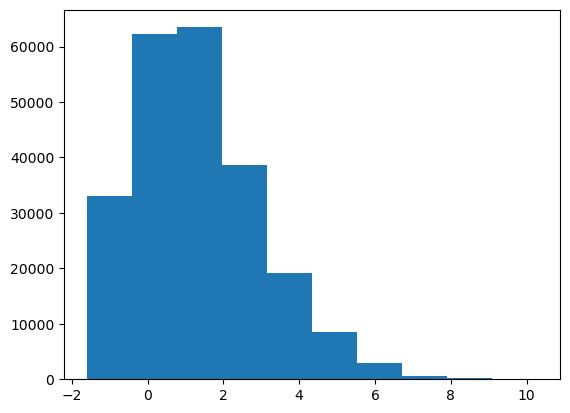

In [13]:
Xp = X.flatten()
Xp = Xp[Xp > 0]
plt.hist(np.log(Xp))
np.max(Xp), len(Xp), V*V

In [14]:
Xmax = 1000
eps=1e-3
lr = 0.1
beta = 0.99
epochs = 200

np.random.seed(42)

w = 2 * (np.random.rand(2*V, emb_size) - 0.5) / (emb_size + 1)
b = 2 * (np.random.rand(2*V) - 0.5) / (emb_size + 1)
g_w_s = np.ones((2 * V, emb_size), dtype=np.float32)
g_b_s = np.ones(2 * V, dtype=np.float32)
 
indexes = []
all_idx = np.arange(V)
for i in range(V):
    mask = X[i] != 0
    if np.sum(mask) == 0: continue
    for j in all_idx[mask]:
        indexes.append((i, j))
len(indexes), indexes[0:10]

(228697,
 [(4, 4),
  (4, 5),
  (4, 6),
  (4, 7),
  (4, 8),
  (4, 9),
  (4, 11),
  (4, 12),
  (4, 13),
  (4, 14)])

In [15]:
def J():
    result = 0
    for i in range(V):
        for j in range(V):
            result += f(X[i][j]) * np.power(
                np.dot(w[i], w[j+V]) + b[i] + b[j+V] - np.log1p(X[i][j]), 2)
            
    return result

def f(x, alpha=0.75):
    if x < Xmax:
        return np.power(x / Xmax, alpha)
    else:
        return 1.0
    
def W(word):
    ww = w[word_index[word]]
    return ww / np.linalg.norm(ww)

all_js = []
for e in range(epochs):
    cost = 0
    shuffle(indexes)
    for i, jj in indexes:
        j = jj + V
        weight = f(X[i][jj])
        inner = (np.dot(w[i], w[j]) + b[i] + b[j] - np.log(X[i][jj]))
        dwi = w[j] * weight * inner
        dwj = w[i] * weight * inner
        dbi = dbj = weight * inner
        cost += weight * inner ** 2
        w[i] -= np.clip(lr * dwi / np.sqrt(g_w_s[i] + eps), -1, 1)
        w[j] -= np.clip(lr * dwj / np.sqrt(g_w_s[j] + eps), -1, 1)
        b[i] -= np.clip(lr * dbi / np.sqrt(g_b_s[i] + eps), -1, 1)
        b[j] -= np.clip(lr * dbj / np.sqrt(g_b_s[j] + eps), -1, 1)

        g_w_s[i] = beta * g_w_s[i] + np.square(dwi)
        g_w_s[j] = beta * g_w_s[j] + np.square(dwj)
        g_b_s[i] = beta * g_b_s[i] + np.square(dbi)
        g_b_s[j] = beta * g_b_s[j] + np.square(dbj)
            
    all_js.append(cost)
    
    print(e, np.round(cost, 2), np.round(W('good').dot(W('bad')), 4))

0 29336.49 0.9353
1 6209.21 0.6538
2 4902.44 0.6158
3 3988.35 0.6617
4 3610.17 0.6096
5 3362.6 0.6588
6 3271.74 0.6451
7 3260.83 0.6787
8 3127.32 0.6927
9 3138.6 0.6291
10 3102.58 0.6103
11 3010.74 0.5691
12 3014.3 0.5153
13 2947.73 0.4247
14 2921.75 0.6921
15 2884.12 0.5402
16 2934.4 0.4878
17 2952.51 0.4632
18 2919.06 0.5452
19 2884.94 0.3393
20 2894.71 0.1499
21 2837.11 0.3681
22 2870.28 0.3424
23 2892.81 0.459
24 2898.75 0.2965
25 2853.2 0.2828
26 2898.21 0.5094
27 2895.6 0.5565
28 2932.34 0.3574
29 2830.02 0.2902
30 2981.9 0.366
31 2905.51 0.3182
32 2858.98 0.2384
33 2863.66 0.3331
34 2883.8 0.313
35 2850.05 0.2705
36 2884.22 0.3442
37 2881.82 0.332
38 2855.93 0.5242
39 2871.36 0.3849
40 2859.14 0.2462
41 2912.04 0.0688
42 2854.57 0.1595
43 2857.09 0.1715
44 2891.69 0.3382
45 2896.07 0.2782
46 2847.04 0.2945
47 2907.14 0.3263
48 2905.86 0.1751
49 2894.34 0.1864
50 2883.74 0.2476
51 2825.19 0.1768
52 2896.64 0.1802
53 2861.99 0.2818
54 2866.78 0.3351
55 2859.62 0.0729
56 2858.5 0.1

Now explain with your own words how Glove works.  Find which word is a synonym for `positive` and an antonym for `positive`.

GloVe works by creatubg a global co-occurrence matrix and using a log-bilinear regression model to get relationships between words. The model uses both global statistical information and local context, creating word vectors that are great in capturing semantic and syntactic patterns in text.

Good is the synonym for positive, and bad is the antonym for positive. 

# 3. Convolution Based NLP

In an attempt to create our first generator network before we start using transformers, you will build a large language model using a Convolutional (causal) and Embeddings.

We will split this task into two task.

- First task is to try to predict the next word.
- Second task is to implement and train a network that will use the head to predict the sentiment of the sentence.

In [1]:
import torch
from torch import nn
from torch.nn import functional as F
import keras
from keras import preprocessing
from keras.datasets import imdb
import matplotlib.pyplot as plt

In [2]:
device = 'cuda'

In [4]:
import string

class Tokenizer:
    def __init__(self):
        self.chars = ['\00', '\01'] + sorted(list(set(string.printable)))
        self.vocab_size = len(self.chars)
        self.stoi = { ch:i for i,ch in enumerate(self.chars) }
        self.itos = { i:ch for i,ch in enumerate(self.chars) }
        
        self.itos[0] = '[START]'
        self.itos[1] = '[OOV]'
                            
    def encode(self, sentence):
        return [self.stoi[c] if c in self.stoi else 1 for c in sentence]
    
    def decode(self, indexes):
        return [self.itos[i] for i in indexes]
    
    def start(self): return '\00'

    def oov(self): return '\01'
    
tokenizer = Tokenizer()
print(tokenizer.encode('hello world'))
print(tokenizer.decode([0] + [1] + tokenizer.encode('\x96hello world')))

[79, 76, 83, 83, 86, 7, 94, 86, 89, 83, 75]
['[START]', '[OOV]', '[OOV]', 'h', 'e', 'l', 'l', 'o', ' ', 'w', 'o', 'r', 'l', 'd']


In [5]:
maxlen = 1024
emb_size = 50

start_char = 1
oov_char = 2
index_from = 3

In [6]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(
    start_char=start_char, oov_char=oov_char, index_from=index_from
)

In [7]:
word_index = imdb.get_word_index()
inverted_word_index = dict(
    (i + index_from, word) for (word, i) in word_index.items()
)
# Update `inverted_word_index` to include `start_char` and `oov_char`
inverted_word_index[start_char] = tokenizer.start()
inverted_word_index[oov_char] = tokenizer.oov()

In [8]:
def retokenize(text):
    return [tokenizer.encode('  '.join([inverted_word_index[idx] for idx in text[i]])) 
            for i in range(len(text))]

x_train = retokenize(x_train)
x_test = retokenize(x_test)
np.array(x_train[0])

array([ 0,  7,  7, ..., 72, 83, 83])

In [9]:
x_train_c = np.concatenate(x_train)
x_test_c = np.concatenate(x_test)
x_train_c.shape, x_test_c.shape

((38024315,), (36523678,))

In [10]:
vocab_size = tokenizer.vocab_size

In [11]:
class CausalConv1d(nn.Module):
    def __init__(self, embedding_size, window, dilation):
        super().__init__()
        self.conv1d = nn.Conv1d(
            embedding_size, embedding_size, 
            kernel_size=window, groups=embedding_size,
            padding=(window-1)*dilation, dilation=dilation)
        self.ln = nn.LayerNorm(embedding_size)
        
    def forward(self, x):
        # pytorch requires C to be in dimension 1
        x = x.permute(0, 2, 1) # (B, C, T)
        # we do convolution from C -> C, but with only one group
        # that means that we are doing a depthwise convolution
        # so that we use the same filter for each embedding
        x = self.conv1d(x)
        # after the convolution, we need to restore the dimension
        # and remove the extra right padding
        x = x[:, :, :-self.conv1d.padding[0]]
        x = x.permute(0, 2, 1) # (B, T, C)
        return self.ln(x)
    
class Head(nn.Module):
    def __init__(self, embedding_size, vocab_size, max_len, window, dropout):
        super().__init__()
        self.max_len = max_len
        self.wte = nn.Embedding(vocab_size, embedding_size)
        self.wpe = nn.Embedding(max_len, embedding_size)
        self.dropout = nn.Dropout(dropout)
        self.conv1d_0 = CausalConv1d(embedding_size, window, dilation=1)
        self.conv1d_1 = CausalConv1d(embedding_size, window, dilation=1)
        self.lin_0 = nn.Linear(embedding_size, embedding_size)
        self.lin_1 = nn.Linear(embedding_size, embedding_size)
        self.lin_2 = nn.Linear(embedding_size, embedding_size)
        self.ln_0 = nn.LayerNorm(embedding_size)
        self.time_shift = nn.ZeroPad2d((0,0,1,0)) # TRICK: time-mix
        
    def forward(self, idx):
        device = idx.device
        B, T = idx.shape
        
        assert T <= self.max_len

        tok_emb = self.wte(idx) # (B, T, C)
        
        B, T, C = tok_emb.shape
        
        pos = torch.arange(
            0, T, dtype=torch.long, device=device).unsqueeze(0)
        pos_emb = self.wpe(pos)
        x = self.dropout(tok_emb + pos_emb)
        x = self.ln_0(x)
        x = torch.cat([self.time_shift(x)[:,:T,:C//2], x[:,:T,C//2:]], dim=2) # TRICK: time-mix
        # idea is to do Linear C dimension
        # followed by a causal filter on the T dimension
        x = nn.GELU(approximate='tanh')(self.lin_0(x))
        x = nn.GELU(approximate='tanh')(self.conv1d_0(x))

        x = nn.GELU(approximate='tanh')(self.lin_1(x))
        x = nn.GELU(approximate='tanh')(self.conv1d_1(x))

        x = nn.GELU(approximate='tanh')(self.lin_2(x))
        return x

class LLM(nn.Module):
    def __init__(self, embedding_size, vocab_size):
        super().__init__()
        self.ln = nn.LayerNorm(embedding_size)
        self.linv = nn.Linear(embedding_size, vocab_size)
        
    def forward(self, x):
        out = self.linv(self.ln(x))
            
        return out

In [12]:
head = Head(emb_size, vocab_size, maxlen, maxlen, 0.15)
head = head.to(device)
model = LLM(emb_size, vocab_size)
model = model.to(device)
for name, params in head.named_parameters():
    print(name, params.shape)
print()
for name, params in model.named_parameters():
    print(name, params.shape)

wte.weight torch.Size([102, 50])
wpe.weight torch.Size([1024, 50])
conv1d_0.conv1d.weight torch.Size([50, 1, 1024])
conv1d_0.conv1d.bias torch.Size([50])
conv1d_0.ln.weight torch.Size([50])
conv1d_0.ln.bias torch.Size([50])
conv1d_1.conv1d.weight torch.Size([50, 1, 1024])
conv1d_1.conv1d.bias torch.Size([50])
conv1d_1.ln.weight torch.Size([50])
conv1d_1.ln.bias torch.Size([50])
lin_0.weight torch.Size([50, 50])
lin_0.bias torch.Size([50])
lin_1.weight torch.Size([50, 50])
lin_1.bias torch.Size([50])
lin_2.weight torch.Size([50, 50])
lin_2.bias torch.Size([50])
ln_0.weight torch.Size([50])
ln_0.bias torch.Size([50])

ln.weight torch.Size([50])
ln.bias torch.Size([50])
linv.weight torch.Size([102, 50])
linv.bias torch.Size([102])


In [13]:
batch_size = 32

loss_f = F.cross_entropy

def get_batch(data):
    ix = torch.randint(len(data) - maxlen, (batch_size,))
    x = torch.stack([
        torch.from_numpy(data[i:i+maxlen].astype(np.int64)) for i in ix])
    y = torch.stack([
        torch.from_numpy(data[i+1:i+maxlen+1].astype(np.int64)) for i in ix])
    x, y = x.to(device), y.to(device)
    return x, y

@torch.no_grad()
def estimate_loss(x_train_c, x_test_c, eval_iters=100):
    def _internal(model):
        dataset = {'train': x_train_c, 'val': x_test_c}
        out = {}
        model.eval()
        for split in ['train', 'val']:
            losses = torch.zeros(eval_iters)
            for k in range(eval_iters):
                X, Y = get_batch(dataset[split])
                p = model(head(X))
                B, T, C = p.shape
                loss = loss_f(p.view(B*T, C), Y.view(B*T))
                losses[k] = loss.item()
            out[split] = losses.mean()
        model.train()
        return out
    return _internal


In [14]:
x1, y1 = get_batch(x_train_c)
x1[0], y1[0]

(tensor([ 7, 91, 79,  ...,  7, 94, 72], device='cuda:0'),
 tensor([91, 79, 76,  ..., 94, 72, 90], device='cuda:0'))

In [15]:
import math

def get_lr_func(warmup_iters, learning_rate, lr_decay_iters,  min_lr):
    def __get_lr__(it):
        nonlocal decay_ratio
        # 1) linear warmup for warmup_iters steps
        if it < warmup_iters:
            return learning_rate * it / warmup_iters
        # 2) if it > lr_decay_iters, return min learning rate
        if it > lr_decay_iters:
            return min_lr
        # 3) in between, use cosine decay down to min learning rate
        decay_ratio = (it - warmup_iters) / (lr_decay_iters - warmup_iters)
        assert 0 <= decay_ratio <= 1
        coeff = 0.5 * (1.0 + math.cos(math.pi * decay_ratio)) # coeff ranges 0..1
        return min_lr + coeff * (learning_rate - min_lr)

    decay_ratio = 0
    return __get_lr__

learning_rate = 0.005
get_lr = get_lr_func(1000, learning_rate, 100000, learning_rate/10)

In [16]:
iter_num = 0
logs = []

In [17]:
epochs = 50000

params = list(head.parameters()) + list(model.parameters())
estimate_loss_f = estimate_loss(x_train_c, x_test_c)
optimizer = torch.optim.AdamW(params, lr=learning_rate)

for iter_num in range(iter_num, iter_num + epochs):
    learning_rate = get_lr(iter_num)
    for param_group in optimizer.param_groups:
        param_group['lr'] = learning_rate
    if iter_num % 1000 == 0:
        losses = estimate_loss_f(model)
        print(
            f'step {iter_num}: train loss {losses["train"]:.4f}, '
            f'val loss {losses["val"]:.4f}')
        logs.append((iter_num, losses['train'], losses['val']))
    
    xb, yb = get_batch(x_train_c)
    pb = model(head(xb))
    B, T, C = pb.shape
    loss = loss_f(pb.view(B*T, C), yb.view(B*T))

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    torch.cuda.empty_cache()

C:\Users\Owner\anaconda3\envs\tf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


step 0: train loss 4.8904, val loss 4.8912
step 1000: train loss 1.7008, val loss 1.6850
step 2000: train loss 1.5265, val loss 1.5129
step 3000: train loss 1.4746, val loss 1.4551
step 4000: train loss 1.4517, val loss 1.4335
step 5000: train loss 1.4416, val loss 1.4197
step 6000: train loss 1.4268, val loss 1.4059
step 7000: train loss 1.4222, val loss 1.4031
step 8000: train loss 1.4147, val loss 1.3954
step 9000: train loss 1.4100, val loss 1.3925
step 10000: train loss 1.4114, val loss 1.3886
step 11000: train loss 1.4042, val loss 1.3836
step 12000: train loss 1.4020, val loss 1.3853
step 13000: train loss 1.4016, val loss 1.3821
step 14000: train loss 1.3981, val loss 1.3846
step 15000: train loss 1.3980, val loss 1.3780
step 16000: train loss 1.3961, val loss 1.3777
step 17000: train loss 1.3969, val loss 1.3732
step 18000: train loss 1.3940, val loss 1.3768
step 19000: train loss 1.3922, val loss 1.3726
step 20000: train loss 1.3895, val loss 1.3746
step 21000: train loss 1.3

In [18]:

#plt.plot([v[1] for v in logs][3:], label='train')
#plt.plot([v[2] for v in logs][3:], label='val')
#plt.legend()
#plt.show()

In [19]:
x_test_c[0:20]

array([ 0,  7,  7, 87, 83, 76, 72, 90, 76,  7,  7, 78, 80, 93, 76,  7,  7,
       91, 79, 80])

In [20]:
np.array(tokenizer.decode(x_test_c[0:20]))

array(['[START]', ' ', ' ', 'p', 'l', 'e', 'a', 's', 'e', ' ', ' ', 'g',
       'i', 'v', 'e', ' ', ' ', 't', 'h', 'i'], dtype='<U7')

In [21]:
def generate(idx, max_new_tokens):
    for _ in range(max_new_tokens):
        idx_cond = idx[:, -maxlen:]
        logits = model(head(idx_cond))
        logits = logits[:, 0, :]
        probs = F.softmax(logits, dim=-1)
        idx_next = torch.multinomial(probs, num_samples=1)
        if idx_next == 0: break
        idx = torch.cat((idx, idx_next), dim=1)
    return idx

In [22]:
idx = np.array([x_test_c[0:20]]).astype(np.int64)
result = generate(torch.from_numpy(idx).to(device), max_new_tokens=100).detach().cpu().numpy()
result

array([[ 0,  7,  7, 87, 83, 76, 72, 90, 76,  7,  7, 78, 80, 93, 76,  7,
         7, 91, 79, 80,  7, 91,  7,  7,  7, 79, 76, 85, 79, 80, 76, 76,
        96, 79, 79,  7, 91, 76, 89, 91, 80, 96, 79, 80, 86, 80, 76, 86,
        96, 80, 82,  7, 79, 74,  7,  7,  7,  7, 76, 89, 76, 90, 76, 91,
        72, 76,  7,  7, 76, 77, 90,  7,  7, 75, 80, 83, 74,  7, 76,  7,
        72,  7, 77, 14,  7, 76, 76, 80,  7, 76, 79,  7,  7, 80, 76, 76,
        85,  7, 89, 92,  7, 73,  7, 75, 90,  7, 79, 76, 91, 86, 76, 96,
        72, 96, 76, 86, 92, 94, 86, 89]], dtype=int64)

In [23]:
decoded_sequence = ''.join(tokenizer.decode(result[0]))
decoded_sequence

"[START]  please  give  thi t   henhieeyhh tertiyhioieoyik hc    eresetae  efs  dilc e a f' eei eh  ieen ru b ds hetoeyayeouwor"